# Klasifikasi Bunga Daisy, Dandelion, Rose, Sunflower, dan Tulip

# CNN (NON-PRETRAINED)

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
ZIP_PATH = "dataset_uap.zip"
EXTRACT_PATH = "dataset_uap"

if not os.path.exists(EXTRACT_PATH):
    with zipfile.ZipFile(ZIP_PATH, "r") as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)

print(os.listdir(EXTRACT_PATH))

DATASET_DIR = "dataset_uap/dataset_uap"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20


['dataset_uap']


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

class_names = list(train_data.class_indices.keys())
num_classes = len(class_names)


Found 6767 images belonging to 5 classes.
Found 1688 images belonging to 5 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])


In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,957 (84.86 MB)

 Trainable params: 22,245,957 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Epoch 1/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 113s 517ms/step - accuracy: 0.3509 - loss: 1.6822 - val_accuracy: 0.5284 - val_loss: 1.1878
Epoch 2/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 464ms/step - accuracy: 0.5589 - loss: 1.1356 - val_accuracy: 0.5610 - val_loss: 1.0937
Epoch 3/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 99s 465ms/step - accuracy: 0.5763 - loss: 1.0569 - val_accuracy: 0.5912 - val_loss: 1.0190
Epoch 4/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 463ms/step - accuracy: 0.6336 - loss: 0.9503 - val_accuracy: 0.6321 - val_loss: 0.9210
Epoch 5/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 99s 468ms/step - accuracy: 0.6517 - loss: 0.8936 - val_accuracy: 0.6286 - val_loss: 0.9095
Epoch 6/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 100s 473ms/step - accuracy: 0.6811 - loss: 0.8383 - val_accuracy: 0.6623 - val_loss: 0.8405
Epoch 7/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 99s 465ms/step - accuracy: 0.6921 - loss: 0.8088 - val_accuracy: 0.6878 - val_loss: 0.8307
Epoch 8/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 464ms/step - accuracy: 0.7050 - loss:

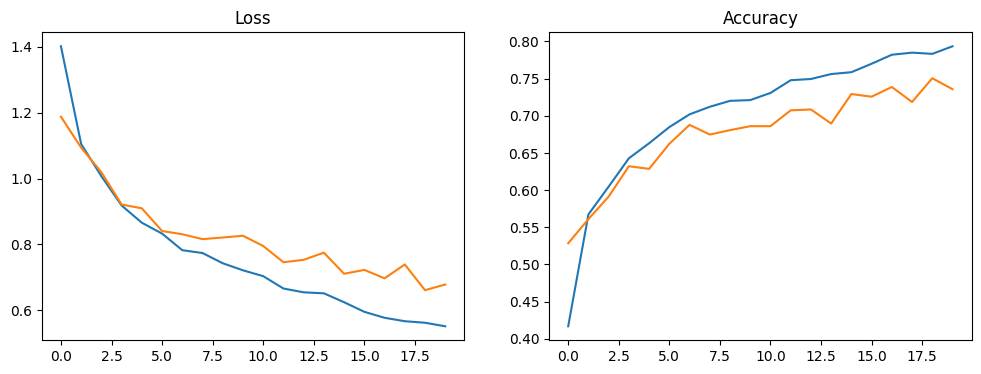

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")

plt.show()


In [ ]:
val_data.reset()
pred = model.predict(val_data)
y_pred = np.argmax(pred, axis=1)
y_true = val_data.classes


53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 338ms/step


In [ ]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


              precision    recall  f1-score   support

       daisy       0.83      0.74      0.78       300
   dandelion       0.74      0.83      0.79       409
        rose       0.62      0.69      0.66       308
   sunflower       0.83      0.80      0.82       286
       tulip       0.74      0.65      0.70       385

    accuracy                           0.75      1688
   macro avg       0.75      0.75      0.75      1688
weighted avg       0.75      0.75      0.75      1688



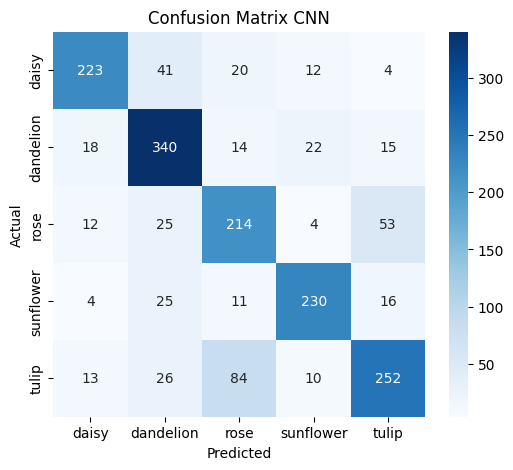

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix CNN")
plt.show()


In [ ]:
os.makedirs("models", exist_ok=True)
model.save("models/cnn_flower_model.keras")


# MobileNetV2 transfer learning


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    Input, GlobalAveragePooling2D,
    Dense, Dropout
)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
datagen_mn = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_mn = datagen_mn.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_mn = datagen_mn.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 6767 images belonging to 5 classes.
Found 1688 images belonging to 5 classes.


In [ ]:
inputs = Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model_mobilenet = Model(inputs, outputs)


In [ ]:
model_mobilenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_mobilenet.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history_mobilenet = model_mobilenet.fit(
    train_mn,
    validation_data=val_mn,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 148s 642ms/step - accuracy: 0.6493 - loss: 0.9013 - val_accuracy: 0.8300 - val_loss: 0.4533
Epoch 2/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 104s 491ms/step - accuracy: 0.8289 - loss: 0.4719 - val_accuracy: 0.8258 - val_loss: 0.4530
Epoch 3/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 97s 456ms/step - accuracy: 0.8444 - loss: 0.4232 - val_accuracy: 0.8430 - val_loss: 0.4215
Epoch 4/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 460ms/step - accuracy: 0.8567 - loss: 0.3898 - val_accuracy: 0.8560 - val_loss: 0.3819
Epoch 5/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 465ms/step - accuracy: 0.8715 - loss: 0.3426 - val_accuracy: 0.8549 - val_loss: 0.3561
Epoch 6/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 97s 458ms/step - accuracy: 0.8853 - loss: 0.3001 - val_accuracy: 0.8614 - val_loss: 0.3660
Epoch 7/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 464ms/step - accuracy: 0.8814 - loss: 0.3306 - val_accuracy: 0.8643 - val_loss: 0.3412
Epoch 8/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 97s 460ms/step - accuracy: 0.8884 - loss:

In [ ]:
val_mn.reset()
pred = model_mobilenet.predict(val_mn)
y_pred = pred.argmax(axis=1)
y_true = val_mn.classes

53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 432ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

       daisy       0.91      0.89      0.90       300
   dandelion       0.90      0.92      0.91       409
        rose       0.87      0.84      0.85       308
   sunflower       0.91      0.92      0.92       286
       tulip       0.87      0.88      0.88       385

    accuracy                           0.89      1688
   macro avg       0.89      0.89      0.89      1688
weighted avg       0.89      0.89      0.89      1688



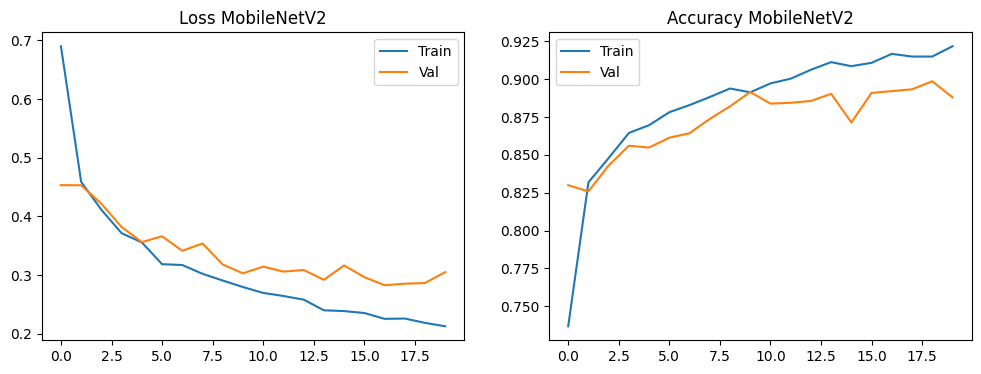

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_mobilenet.history["loss"], label="Train")
plt.plot(history_mobilenet.history["val_loss"], label="Val")
plt.title("Loss MobileNetV2")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_mobilenet.history["accuracy"], label="Train")
plt.plot(history_mobilenet.history["val_accuracy"], label="Val")
plt.title("Accuracy MobileNetV2")
plt.legend()

plt.show()

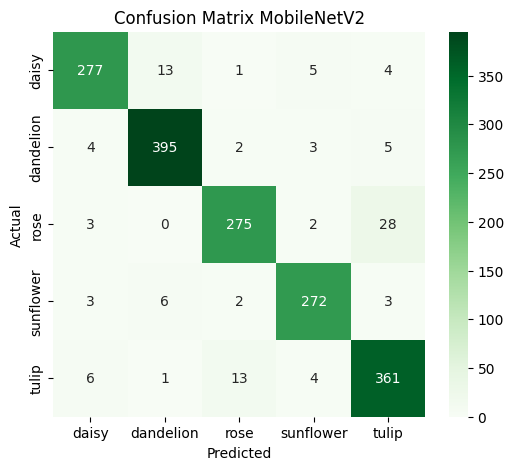

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Greens"
)
plt.title("Confusion Matrix MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
model_mobilenet.save("models/mobilenetv2_flower_model.keras")

# EfficientNetB0 transfer learning

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
datagen_eff = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_eff = datagen_eff.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_eff = datagen_eff.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 6767 images belonging to 5 classes.
Found 1688 images belonging to 5 classes.


In [ ]:
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)
base_model.trainable = False

In [ ]:
inputs = Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model_effnet = Model(inputs, outputs)

In [ ]:
model_effnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_effnet.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,184 (16.08 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history_effnet = model_effnet.fit(
    train_eff,
    validation_data=val_eff,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 139s 562ms/step - accuracy: 0.6949 - loss: 0.7818 - val_accuracy: 0.8762 - val_loss: 0.3612
Epoch 2/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 463ms/step - accuracy: 0.8841 - loss: 0.3302 - val_accuracy: 0.8892 - val_loss: 0.3158
Epoch 3/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 463ms/step - accuracy: 0.8965 - loss: 0.2959 - val_accuracy: 0.9064 - val_loss: 0.2576
Epoch 4/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 97s 458ms/step - accuracy: 0.9145 - loss: 0.2424 - val_accuracy: 0.9100 - val_loss: 0.2482
Epoch 5/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 97s 459ms/step - accuracy: 0.9187 - loss: 0.2220 - val_accuracy: 0.9040 - val_loss: 0.2466
Epoch 6/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 97s 460ms/step - accuracy: 0.9343 - loss: 0.1948 - val_accuracy: 0.9129 - val_loss: 0.2345
Epoch 7/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 464ms/step - accuracy: 0.9366 - loss: 0.1811 - val_accuracy: 0.9141 - val_loss: 0.2250
Epoch 8/20
212/212 ━━━━━━━━━━━━━━━━━━━━ 98s 463ms/step - accuracy: 0.9372 - loss: 

In [ ]:
val_eff.reset()
pred = model_effnet.predict(val_eff)
y_pred = pred.argmax(axis=1)
y_true = val_eff.classes

53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 487ms/step


In [ ]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

       daisy       0.95      0.92      0.93       300
   dandelion       0.95      0.97      0.96       409
        rose       0.94      0.89      0.92       308
   sunflower       0.95      0.95      0.95       286
       tulip       0.90      0.94      0.92       385

    accuracy                           0.94      1688
   macro avg       0.94      0.93      0.94      1688
weighted avg       0.94      0.94      0.94      1688



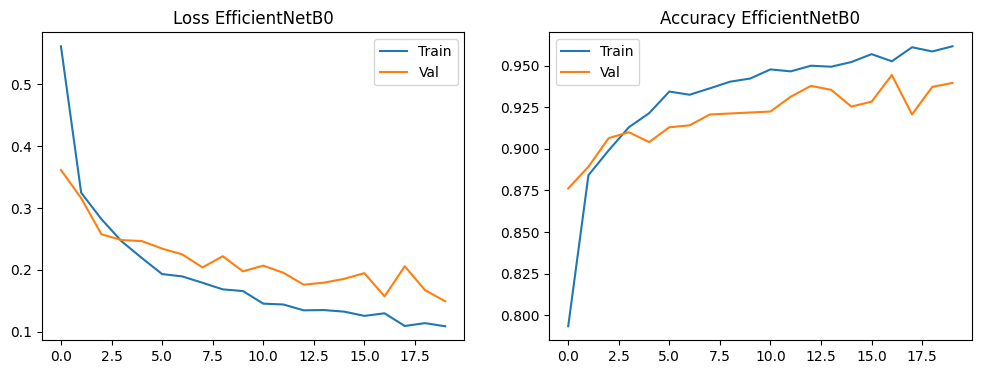

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_effnet.history["loss"], label="Train")
plt.plot(history_effnet.history["val_loss"], label="Val")
plt.title("Loss EfficientNetB0")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_effnet.history["accuracy"], label="Train")
plt.plot(history_effnet.history["val_accuracy"], label="Val")
plt.title("Accuracy EfficientNetB0")
plt.legend()

plt.show()

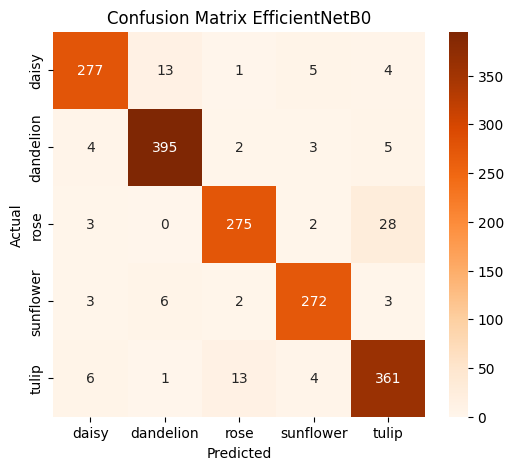

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Oranges"
)
plt.title("Confusion Matrix EfficientNetB0")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
model_effnet.save("models/efficientnetb0_flower_model.keras")

# Download Models

In [ ]:
import os

os.listdir("models")


['efficientnetb0_flower_model.keras',
 'cnn_flower_model.keras',
 'mobilenetv2_flower_model.keras']

In [ ]:
import shutil

zip_name = "models_uap.zip"

if os.path.exists(zip_name):
    os.remove(zip_name)

shutil.make_archive(
    base_name="models_uap",
    format="zip",
    root_dir="models"
)

print("models folder zipped")

models folder zipped


In [ ]:
from google.colab import files

files.download("models_uap.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Download Ke Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!cp models_uap.zip /content/drive/MyDrive/